<a href="https://colab.research.google.com/github/Nikhild1093/Nikhild1093/blob/main/Titanic_Survival_Prediction_Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import seaborn as sns

In [2]:
data = pd.read_csv('/content/train.csv')

In [3]:
test_data = pd.read_csv('/content/test.csv')

Checking the data for missing values

In [4]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking data for feature selection

<Axes: xlabel='Pclass', ylabel='count'>

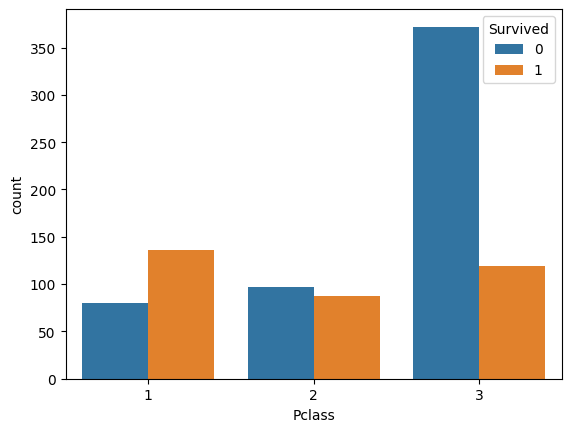

In [6]:
sns.countplot(x='Pclass', hue = 'Survived', data=data)

<Axes: xlabel='Sex', ylabel='count'>

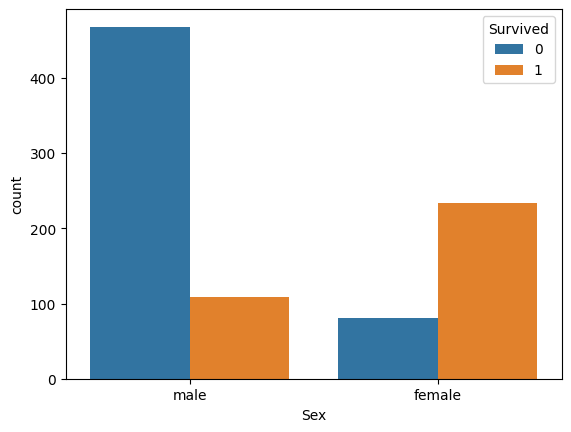

In [7]:
sns.countplot(x='Sex', hue = 'Survived', data=data)

<Axes: xlabel='Age', ylabel='Count'>

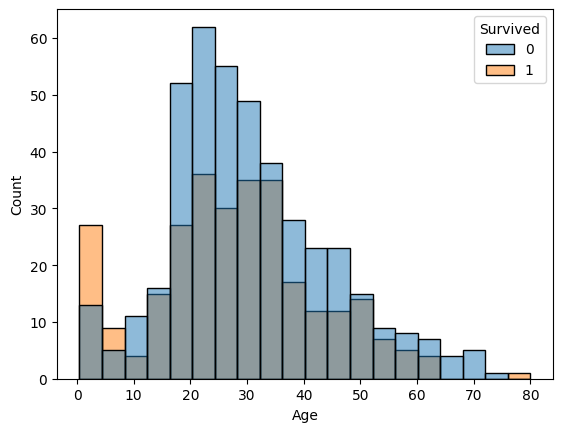

In [9]:
sns.histplot(x='Age', hue = 'Survived', data=data)

<Axes: xlabel='SibSp', ylabel='Count'>

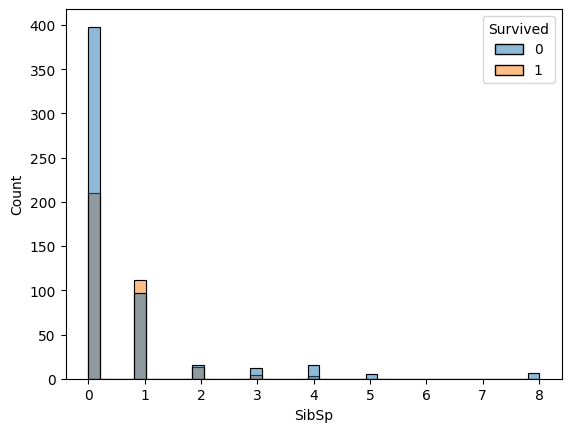

In [11]:
sns.histplot(x='SibSp', hue = 'Survived', data=data)

<Axes: xlabel='Parch', ylabel='Count'>

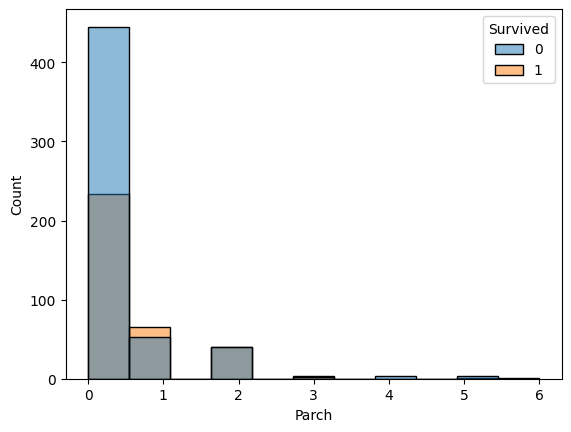

In [13]:
sns.histplot(x='Parch', hue = 'Survived', data=data)

<Axes: xlabel='Cabin', ylabel='Count'>

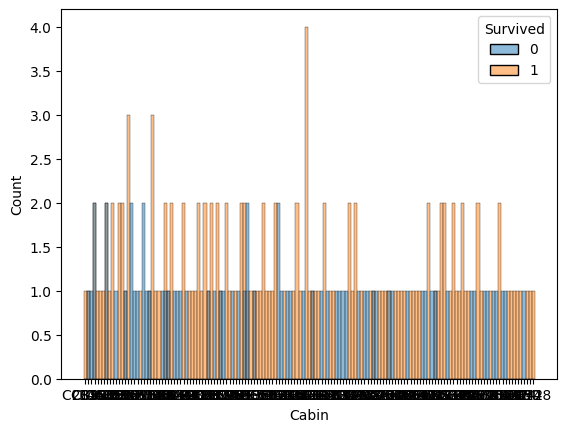

In [15]:
sns.histplot(x='Cabin', hue = 'Survived', data=data)

In [17]:
data['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


<Axes: xlabel='Embarked', ylabel='Count'>

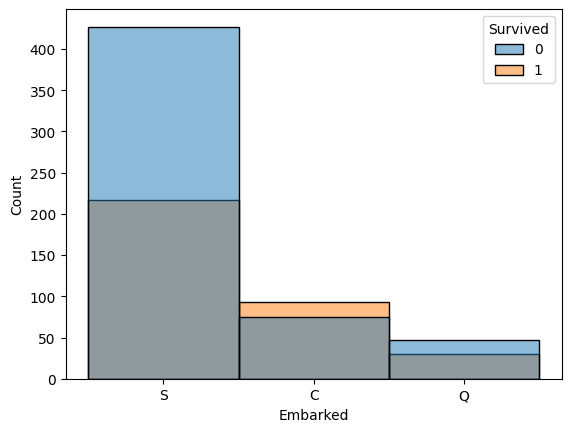

In [18]:
sns.histplot(x='Embarked', hue = 'Survived', data=data)

Encoding catagorical variables

In [52]:
LE = LabelEncoder()
data['Sex'] = LE.fit_transform(data['Sex'])
data['Embarked'] = LE.fit_transform(data['Embarked'])

test_data['Sex'] = LE.fit_transform(test_data['Sex'])
test_data['Embarked'] = LE.fit_transform(test_data['Embarked'])

In [ ]:
Feature Selection

In [63]:
X = data[['Pclass','Sex','SibSp','Parch','Embarked']]
Y = data['Survived']

In [64]:
X

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,1,0,2
1,1,0,1,0,0
2,3,0,0,0,2
3,1,0,1,0,2
4,3,1,0,0,2
...,...,...,...,...,...
886,2,1,0,0,2
887,1,0,0,0,2
888,3,0,1,2,2
889,1,1,0,0,0


Data splitting & model training

In [65]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=1)

In [66]:
model = LogisticRegression(max_iter=1000)
model.fit(Xtrain, Ytrain)

LogisticRegression(max_iter=1000)

Model Evaluation

In [67]:
xtrPredict = model.predict(Xtrain)
print(accuracy_score(xtrPredict,Ytrain))
print(precision_score(xtrPredict,Ytrain))
print(recall_score(xtrPredict,Ytrain))
print(f1_score(xtrPredict,Ytrain))

0.7907303370786517
0.7032967032967034
0.7384615384615385
0.7204502814258912


In [68]:
xtstPredict = model.predict(Xtest)
print(accuracy_score(xtstPredict,Ytest))
print(precision_score(xtstPredict,Ytest))
print(recall_score(xtstPredict,Ytest))
print(f1_score(xtstPredict,Ytest))

0.7988826815642458
0.7101449275362319
0.7538461538461538
0.7313432835820896


Final Prediction

In [53]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,2


In [70]:
XPr = X = test_data[['Pclass','Sex','SibSp','Parch','Embarked']]
XPr

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,0,0,1
1,3,0,1,0,2
2,2,1,0,0,1
3,3,1,0,0,2
4,3,0,1,1,2
...,...,...,...,...,...
413,3,1,0,0,2
414,1,0,0,0,0
415,3,1,0,0,2
416,3,1,0,0,2


In [76]:
prediction = model.predict(XPr)

Final Output for competition submission

In [75]:
test_data['Survived_Prediction'] = prediction
final_data = test_data[['PassengerId','Survived_Prediction']]
final_data

,PassengerId,Survived_Prediction
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
